In [1]:
import pandas as pd
import numpy as np 

In [2]:
# till now
# Timestamp
pd.Timestamp('6th jan 2023 8:10')
# DatetimeIndex -> df and series index
pd.DatetimeIndex([pd.Timestamp('6th jan 2023 8:10'),pd.Timestamp('7th jan 2023 8:10'),pd.Timestamp('8th jan 2023 8:10')])[0]
# date_range()
pd.date_range(start='2023-1-6',end='2023-1-31',freq='D')
# to_datetime()
s = pd.Series(['2023/1/6','2023/1/7','2023/1/7'])
pd.to_datetime(s).dt.day_name()

0      Friday
1    Saturday
2    Saturday
dtype: object

# Timedelta Object
Represents a duration, the difference between two dates or times.

In [3]:
# create using Timestamp object
t1 = pd.Timestamp('6th Jan 2023 8:20:20')
t2 = pd.Timestamp('26th Jan 2024 9:12:40')

t2 -t1 

Timedelta('385 days 00:52:20')

In [4]:
pd.Timedelta(days=2 ,hours=10, minutes=35)

Timedelta('2 days 10:35:00')

In [5]:
pd.Timestamp('6th Jan 2023') + pd.Timedelta(days=2, hours=10, minutes=35)

Timestamp('2023-01-08 10:35:00')

In [6]:
pd.date_range(start='2023-1-6', end='2023-1-31', freq='D') + pd.Timedelta(days=2, hours=10, minutes=35)

DatetimeIndex(['2023-01-08 10:35:00', '2023-01-09 10:35:00',
               '2023-01-10 10:35:00', '2023-01-11 10:35:00',
               '2023-01-12 10:35:00', '2023-01-13 10:35:00',
               '2023-01-14 10:35:00', '2023-01-15 10:35:00',
               '2023-01-16 10:35:00', '2023-01-17 10:35:00',
               '2023-01-18 10:35:00', '2023-01-19 10:35:00',
               '2023-01-20 10:35:00', '2023-01-21 10:35:00',
               '2023-01-22 10:35:00', '2023-01-23 10:35:00',
               '2023-01-24 10:35:00', '2023-01-25 10:35:00',
               '2023-01-26 10:35:00', '2023-01-27 10:35:00',
               '2023-01-28 10:35:00', '2023-01-29 10:35:00',
               '2023-01-30 10:35:00', '2023-01-31 10:35:00',
               '2023-02-01 10:35:00', '2023-02-02 10:35:00'],
              dtype='datetime64[ns]', freq='D')

In [7]:
# real life example

df =pd.read_csv("deliveries (2).csv")
df.head()

,order_date,delivery_date
0,5/24/98,2/5/99
1,4/22/92,3/6/98
2,2/10/91,8/26/92
3,7/21/92,11/20/97
4,9/2/93,6/10/98


In [8]:
df.shape

(501, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_date     501 non-null    object
 1   delivery_date  501 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


In [10]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

C:\Users\Engineer\AppData\Local\Temp\ipykernel_10108\3472121163.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_date'] = pd.to_datetime(df['order_date'])
C:\Users\Engineer\AppData\Local\Temp\ipykernel_10108\3472121163.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['delivery_date'] = pd.to_datetime(df['delivery_date'])


In [11]:
df['delivery time period']=df['delivery_date'] -df['order_date']
df.head()

,order_date,delivery_date,delivery time period
0,1998-05-24,1999-02-05,257 days
1,1992-04-22,1998-03-06,2144 days
2,1991-02-10,1992-08-26,563 days
3,1992-07-21,1997-11-20,1948 days
4,1993-09-02,1998-06-10,1742 days


In [12]:
df['delivery time period']=df['delivery_date'] -df['order_date']
df.head().mean()

order_date              1993-08-09 19:12:00
delivery_date           1997-04-01 14:24:00
delivery time period     1330 days 19:12:00
dtype: object

### Time series

A time series is a data set that tracks a sample over time. In particular, a time series allows one to see what factors influence certain variables from period to period. Time series analysis can be useful to see how a given asset, security, or economic variable changes over time.

Examples

- Financial Data (Company stocks)
- Natural Data (Rainfall measurement)
- Event Data (Covid)
- Medical Data (Heart rate monitoring)

Types of Operations done on Time Series

- Time Series Analysis
- Time Series Forecasting

In [13]:
google =pd.read_csv('google.csv')
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [14]:
google.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4466,2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
4467,2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
4468,2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100
4469,2022-05-19,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600
4470,2022-05-20,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100


In [15]:
google['Date'] = pd.to_datetime(google['Date'])

In [16]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4471 non-null   datetime64[ns]
 1   Open       4471 non-null   float64       
 2   High       4471 non-null   float64       
 3   Low        4471 non-null   float64       
 4   Close      4471 non-null   float64       
 5   Adj Close  4471 non-null   float64       
 6   Volume     4471 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 244.6 KB


In [17]:
google.set_index('Date', inplace=True)

In [18]:
# fetch a specific date
google.loc['2021-12-30']

Open           2929.000000
High           2941.250000
Low            2915.169922
Close          2920.050049
Adj Close      2920.050049
Volume       648900.000000
Name: 2021-12-30 00:00:00, dtype: float64

In [19]:
# sclicing


In [20]:
# challenge -> fetch info for a particular date every year -> limitation of timedelta

google.head()

google[google.index.isin(pd.date_range(start='2005-1-6',end='2022-1-6',freq=pd.DateOffset(years=1)))]



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-06,97.175758,97.584229,93.509506,93.922951,93.922951,20852067
2006-01-06,227.581970,234.371521,225.773743,231.960556,231.960556,35646914
2009-01-06,165.868286,169.763687,162.585587,166.406265,166.406265,12898566
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987226
2011-01-06,304.199799,308.060303,303.885956,305.604523,305.604523,4131026
2012-01-06,328.344299,328.767700,323.681763,323.796326,323.796326,5405987
2014-01-06,554.426880,557.340942,551.154114,556.573853,556.573853,3551864
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000


<Axes: xlabel='Date'>

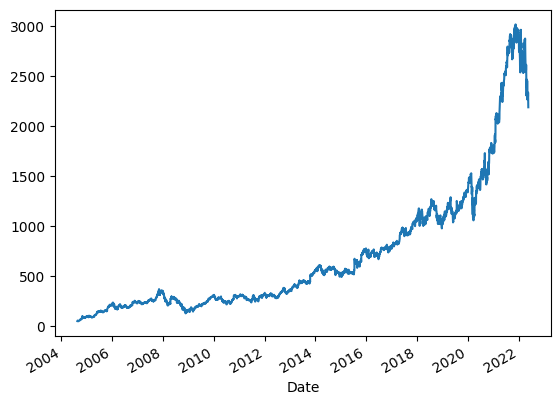

In [21]:
# viz a singleset
google['Close'].plot()

In [22]:
# viz all cils together 


In [23]:
google.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=4471, freq=None)

In [24]:
# asfreq 
google.asfreq('6H', method='ffill')

C:\Users\Engineer\AppData\Local\Temp\ipykernel_10108\529360499.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  google.asfreq('6H', method='ffill')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19 00:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-19 06:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-19 12:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-19 18:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20 00:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
...,...,...,...,...,...,...
2022-05-19 00:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600
2022-05-19 06:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600
2022-05-19 12:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600


C:\Users\Engineer\AppData\Local\Temp\ipykernel_10108\3573321315.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  google['Close'].asfreq('Q').plot()


<Axes: xlabel='Date'>

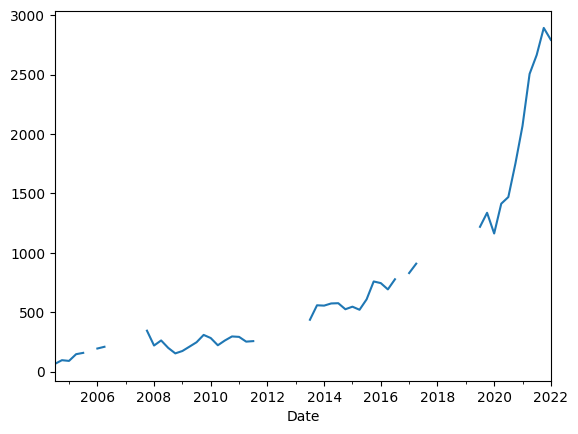

In [25]:
google['Close'].asfreq('Q').plot()

### Resampling

Resampling involves changing the frequency of your time series observations.

Two types of resampling are:

**Upsampling**: Where you increase the frequency of the samples, such as from minutes to seconds.<br>
**Downsampling**: Where you decrease the frequency of the samples, such as from days to months.

C:\Users\Engineer\AppData\Local\Temp\ipykernel_10108\3256021398.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  google['Close'].resample('6H').interpolate(method='linear').plot()


<Axes: xlabel='Date'>

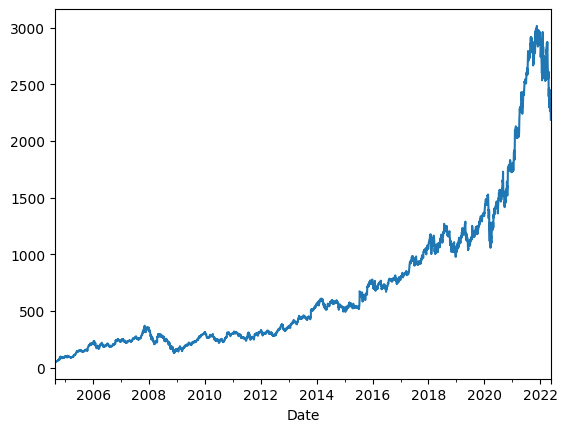

In [26]:
# Downsamling
google['Close'].resample('6H').interpolate(method='linear').plot()


In [27]:
# Upsampling


### Rolling Window(Smoothing)
Time series data in original format can be quite volatile, especially on smaller aggregation levels. The concept of rolling, or moving averages is a useful technique for smoothing time series data. 

### Shifting

The shift() function is Pandas is used to, well, shift the entire series up or down by the desired number of periods.